In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('heart_fin.csv', sep=';')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,target
0,63,1,3,145,233,0,150,0,2.3,1
1,37,1,2,130,250,1,187,0,3.5,1
2,41,0,1,130,204,0,172,0,1.4,1
3,56,1,1,120,236,1,178,0,0.8,1
4,57,0,0,120,354,1,163,1,0.6,1


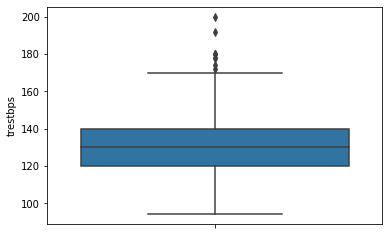

In [4]:
sns.boxplot(y='trestbps', data=df)

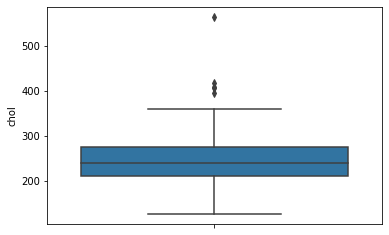

In [5]:
sns.boxplot(y='chol', data=df)

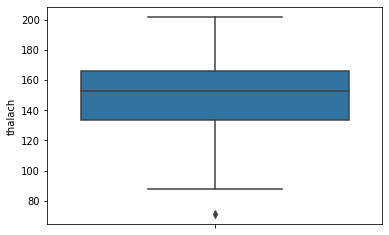

In [6]:
sns.boxplot(y='thalach', data=df)

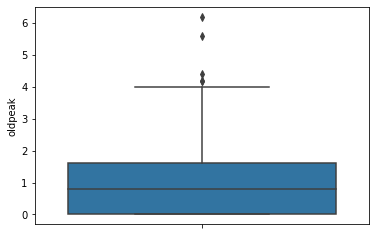

In [7]:
sns.boxplot(y='oldpeak', data=df)

In [8]:
outbursts = ['trestbps', 'chol', 'thalach', 'oldpeak']
rows_to_drop = set()

for outburst in outbursts:
    quantiles = df[outburst].quantile([.25, .75]).values
    q_25, q_75 = quantiles[0], quantiles[1]
    iqr = q_75 - q_25
    upper_bound = q_75 + 1.5 * iqr
    lower_bound = q_25 - 1.5 * iqr
    rows_to_drop = rows_to_drop.union(set(df[(df[outburst] < lower_bound)|((df[outburst] > upper_bound))].index))
df.drop(list(rows_to_drop), inplace=True)

[260,
 8,
 266,
 203,
 204,
 272,
 85,
 220,
 28,
 221,
 223,
 96,
 291,
 101,
 110,
 241,
 246,
 248,
 250]

In [9]:
len(df)

284

In [10]:
X = df.drop('target', axis=1)
y = df['target']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 5)

In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [14]:
lrm = LogisticRegression(max_iter=1000)

In [15]:
knn = KNeighborsClassifier(n_neighbors=3)

In [16]:
lrm.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [17]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [18]:
lrm_y_pred = lrm.predict(X_test)

In [19]:
knn_y_pred = knn.predict(X_test)

In [20]:
from sklearn.metrics import roc_auc_score

In [22]:
lrm_roc_auc_score = roc_auc_score(y_test, lrm_y_pred)
knn_roc_auc_score = roc_auc_score(y_test, knn_y_pred)
print(f'LRM ROC AUC = {lrm_roc_auc_score:.2f}, KNN ROC AUC = {knn_roc_auc_score:.2f}')

LRM ROC AUC = 0.77, KNN ROC AUC = 0.62


In [23]:
1460/11

132.72727272727272